# Setup the environment


In [ ]:
import warnings

try:
    import torch
except ImportError:
    %pip install torch
    import torch
warnings.filterwarnings('ignore')



#robustbench download
%pip install -q git+https://github.com/RobustBench/robustbench.git
#autoattack download
%pip install -q git+https://github.com/fra31/auto-attack

if torch.cuda.is_available():
    device = "cuda"
else:
    device ="cpu"


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 68.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


#Declaring models to attack and type of attacks


In [ ]:
from autoattack import AutoAttack
from robustbench.data import load_cifar10
from robustbench.utils import load_model
import matplotlib.pyplot as plt

all_models =  ["Peng2023Robust","Wang2023Better_WRN-70-16","Wang2023Better_WRN-28-10",
          "Bai2023Improving_edm","Cui2023Decoupled_WRN-28-10","Standard"]


models = [ "Bai2023Improving_edm"]  #these are the models currently in use

attacks = ["apgd-ce","apgd-dlr","fab-t"]
attacks_to_run=['apgd-ce','apgd-dlr'] #these are the attacks currently in use

# Acquiring the datasets and the models from RobustBench

In [ ]:
x_test,y_test = load_cifar10(n_examples=500)
for m in all_models:
    model = load_model(model_name=m,threat_model='Linf')
    total_params = sum(p.numel() for p in model.parameters())
    print(f'Total number of parameters in model {m}: {total_params}')
    print(f'model {m} loaded!')

100%|██████████| 170498071/170498071 [00:12<00:00, 13154503.64it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


Downloading...
From (original): https://drive.google.com/uc?id=1-6M8KHZdPmgqYkBSkdZQ2fLwp86ZQ9VU
From (redirected): https://drive.google.com/uc?id=1-6M8KHZdPmgqYkBSkdZQ2fLwp86ZQ9VU&confirm=t&uuid=8c46c105-5fbb-4f33-a11f-f0103d99470a
To: /content/models/cifar10/Linf/Peng2023Robust.pt
100%|██████████| 1.07G/1.07G [00:27<00:00, 38.5MB/s]


Total number of parameters in model Peng2023Robust: 267240802
model Peng2023Robust loaded!


Downloading...
From (original): https://drive.google.com/uc?id=1-RF7ZSS-PAh6bfQcuqx4lh9bc9BUGnap
From (redirected): https://drive.google.com/uc?id=1-RF7ZSS-PAh6bfQcuqx4lh9bc9BUGnap&confirm=t&uuid=946f284a-ef4d-44bf-aba7-cc67bbd2a1e5
To: /content/models/cifar10/Linf/Wang2023Better_WRN-70-16.pt
100%|██████████| 1.07G/1.07G [00:27<00:00, 38.8MB/s]


Total number of parameters in model Wang2023Better_WRN-70-16: 266796506
model Wang2023Better_WRN-70-16 loaded!


Downloading...
From (original): https://drive.google.com/uc?id=1-6MYKJdECDVGaWjj6GgqvaT95BGKhUvI
From (redirected): https://drive.google.com/uc?id=1-6MYKJdECDVGaWjj6GgqvaT95BGKhUvI&confirm=t&uuid=4526f4e8-489c-4375-b404-701ee8e3fad0
To: /content/models/cifar10/Linf/Wang2023Better_WRN-28-10.pt
100%|██████████| 146M/146M [00:05<00:00, 26.6MB/s]


Total number of parameters in model Wang2023Better_WRN-28-10: 36479194
model Wang2023Better_WRN-28-10 loaded!
The STD classifier has 232279178 parameters. 0 parameters are trainable.
The ROB classifier has 266796506 parameters. 0 parameters are trainable.
The mixing network has 67848704 parameters. 67848704 parameters are trainable.

gamma has been set to 2.5, but the mixing network is active so the change is not effective.
gamma has been set to 3.0, but the mixing network is active so the change is not effective.
The mixing network's gamma mean is set to 1.0499999523162842.
The mixing network's gamma standard deviation is set to 2.0.
The range of alpha during evaluation is set to (0.9599999785423279, 1.0).
The logit output scale of the STD network is set to 1.2000000476837158.
The logit output scale of the ROB network is set to 0.30000001192092896.



Downloading...
From (original): https://drive.google.com/uc?id=1-5EwY_5tQZudo9idwXiUGr3P4OUUGaQN
From (redirected): https://drive.google.com/uc?id=1-5EwY_5tQZudo9idwXiUGr3P4OUUGaQN&confirm=t&uuid=efb1c573-49f8-42ff-a205-6be9fb2cc70d
To: /content/models/cifar10/Linf/Bai2023Improving_edm.pt_m0.pt
100%|██████████| 929M/929M [00:23<00:00, 39.0MB/s]


Downloading...
From (original): https://drive.google.com/uc?id=1-RF7ZSS-PAh6bfQcuqx4lh9bc9BUGnap
From (redirected): https://drive.google.com/uc?id=1-RF7ZSS-PAh6bfQcuqx4lh9bc9BUGnap&confirm=t&uuid=688df38f-e0c8-45f4-a188-d51e7b69cf9c
To: /content/models/cifar10/Linf/Bai2023Improving_edm.pt_m1.pt
100%|██████████| 1.07G/1.07G [00:26<00:00, 39.7MB/s]


Downloading...
From (original): https://drive.google.com/uc?id=1-7oV7QDgz8McvhbaCj6Owx3Rz3daiPrT
From (redirected): https://drive.google.com/uc?id=1-7oV7QDgz8McvhbaCj6Owx3Rz3daiPrT&confirm=t&uuid=cdf3e4b1-7680-4f3b-9df9-f4da91e18d09
To: /content/models/cifar10/Linf/Bai2023Improving_edm.pt_m2.pt
100%|██████████| 271M/271M [00:07<00:00, 35.7MB/s]


Total number of parameters in model Bai2023Improving_edm: 566924394
model Bai2023Improving_edm loaded!


Downloading...
From (original): https://drive.google.com/uc?id=1-AaTrYt23WJFR22hXgBd-i6kjpsz6Hf2
From (redirected): https://drive.google.com/uc?id=1-AaTrYt23WJFR22hXgBd-i6kjpsz6Hf2&confirm=t&uuid=705df974-bd90-4343-b53d-f68c380efffc
To: /content/models/cifar10/Linf/Cui2023Decoupled_WRN-28-10.pt
100%|██████████| 146M/146M [00:03<00:00, 45.5MB/s]


Total number of parameters in model Cui2023Decoupled_WRN-28-10: 36479194
model Cui2023Decoupled_WRN-28-10 loaded!


Downloading...
From (original): https://drive.google.com/uc?id=1t98aEuzeTL8P7Kpd5DIrCoCL21BNZUhC
From (redirected): https://drive.google.com/uc?id=1t98aEuzeTL8P7Kpd5DIrCoCL21BNZUhC&confirm=t&uuid=6ab527ba-1900-47c1-ae14-86e3a9dfe773
To: /content/models/cifar10/Linf/Standard.pt
100%|██████████| 292M/292M [00:11<00:00, 25.9MB/s]

Total number of parameters in model Standard: 36479194
model Standard loaded!


Settings

In [ ]:
perturbation = 5 / 255

# Overall and per class accuracy evaluation

In [ ]:
for m in models:
    torch.cuda.empty_cache()
    print("Starting tests for model: {}".format(m))
    model = load_model(model_name=m, threat_model="Linf")
    model.to(device)
    x_test.to(device)
    y_test.to(device)
    num_class = 10
    for i in range(num_class):
        class_indexes = y_test == i
        x_class = x_test[class_indexes].to(device)
        y_class = y_test[class_indexes].to(device)
        print("data for class {}, len of y {}".format(i, len(y_class)))

    # overall accuracy evaluation
    adversary = AutoAttack(
        model,
        norm="Linf",
        eps= perturbation,
        version="custom",
        attacks_to_run=attacks_to_run,
        device=device,
    )
    adversary.apgd.n_restarts = 1
    # Reduce the batch size for RAM usage
    x_adv = adversary.run_standard_evaluation(x_test, y_test, bs=16)

    # accuracy evaluation per class
    new_adversary = AutoAttack(
        model,
        norm="Linf",
        eps= perturbation,
        version="custom",
        attacks_to_run=attacks_to_run,
        device=device,
    )
    new_adversary.apgd.n_restarts = 1
    for i in range(0, num_class):
        torch.cuda.empty_cache()
        class_indexes = y_test == i
        x_class = x_test[class_indexes].to(device)
        y_class = y_test[class_indexes].to(device)
        print("Robustness for class {}".format(i))
        # Reduce the batch size for RAM usage
        x_adv = new_adversary.run_standard_evaluation(x_class, y_class, bs=16)
        print("#####################")
    print("Finished tests for model: {}".format(m))

Starting tests for model: Bai2023Improving_edm
The STD classifier has 232279178 parameters. 0 parameters are trainable.
The ROB classifier has 266796506 parameters. 0 parameters are trainable.
The mixing network has 67848704 parameters. 67848704 parameters are trainable.

gamma has been set to 2.5, but the mixing network is active so the change is not effective.
gamma has been set to 3.0, but the mixing network is active so the change is not effective.
The mixing network's gamma mean is set to 1.0499999523162842.
The mixing network's gamma standard deviation is set to 2.0.
The range of alpha during evaluation is set to (0.9599999785423279, 1.0).
The logit output scale of the STD network is set to 1.2000000476837158.
The logit output scale of the ROB network is set to 0.30000001192092896.

data for class 0, len of y 57
data for class 1, len of y 41
data for class 2, len of y 51
data for class 3, len of y 49
data for class 4, len of y 40
data for class 5, len of y 48
data for class 6, le


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/autoattack/checks.py", line 100, in check_dynamic
    sys.settrace(tracefunc)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/autoattack/checks.py", line 102, in check_dynamic
    sys.settrace(None)



initial accuracy: 95.00%
apgd-ce - 1/30 - 2 out of 16 successfully perturbed
apgd-ce - 2/30 - 1 out of 16 successfully perturbed
apgd-ce - 3/30 - 4 out of 16 successfully perturbed
apgd-ce - 4/30 - 3 out of 16 successfully perturbed
apgd-ce - 5/30 - 1 out of 16 successfully perturbed
apgd-ce - 6/30 - 1 out of 16 successfully perturbed
apgd-ce - 7/30 - 1 out of 16 successfully perturbed
apgd-ce - 8/30 - 2 out of 16 successfully perturbed
apgd-ce - 9/30 - 0 out of 16 successfully perturbed
apgd-ce - 10/30 - 2 out of 16 successfully perturbed
apgd-ce - 11/30 - 2 out of 16 successfully perturbed
apgd-ce - 12/30 - 1 out of 16 successfully perturbed
apgd-ce - 13/30 - 2 out of 16 successfully perturbed
apgd-ce - 14/30 - 2 out of 16 successfully perturbed
apgd-ce - 15/30 - 2 out of 16 successfully perturbed
apgd-ce - 16/30 - 5 out of 16 successfully perturbed
apgd-ce - 17/30 - 1 out of 16 successfully perturbed
apgd-ce - 18/30 - 1 out of 16 successfully perturbed
apgd-ce - 19/30 - 2 out of 16 

#Plotting accuracy results

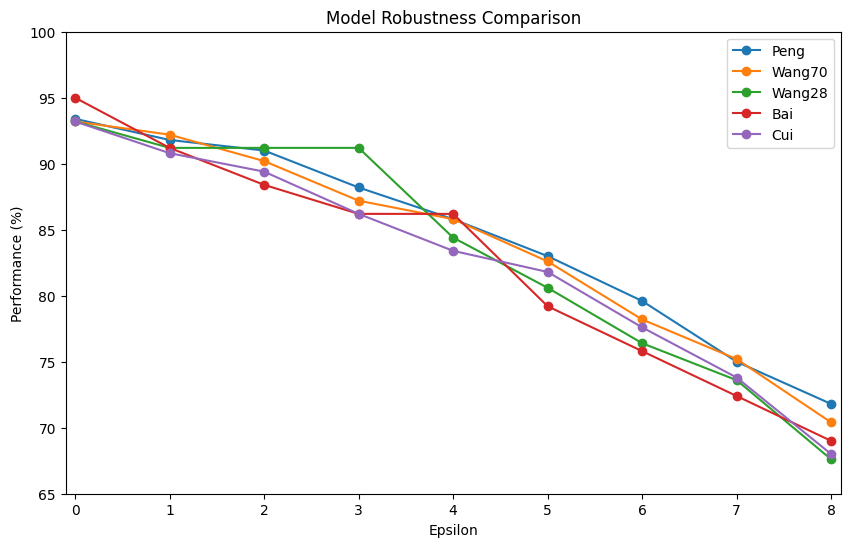

In [ ]:
#Overall

import matplotlib.pyplot as plt
import numpy as np

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng = [93.4, 91.8, 91.0, 88.2, 85.8, 83.0, 79.6, 75.0, 71.8]
Wang70 = [93.2, 92.2, 90.2, 87.2, 85.8, 82.6, 78.2, 75.2, 70.4]
Wang28 = [93.2, 91.2, 91.2, 91.2, 84.4, 80.6, 76.4, 73.6, 67.6]
Bai = [95.0, 91.2, 88.4, 86.2, 86.2, 79.2, 75.8, 72.4, 69.0]
Cui = [93.2, 90.8, 89.4, 86.2, 83.4, 81.8, 77.6, 73.8, 68.0]
#Standard = [94.6, 27.4, 2.4, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng, label='Peng', marker='o')
plt.plot(eps, Wang70, label='Wang70', marker='o')
plt.plot(eps, Wang28, label='Wang28', marker='o')
plt.plot(eps, Bai, label='Bai', marker='o')
plt.plot(eps, Cui, label='Cui', marker='o')
#plt.plot(eps[:len(Standard)], Standard, label='Standard', marker='o')

# Adding titles and labels
plt.title('Model Robustness Comparison')
plt.xlabel('Epsilon')
plt.ylabel('Performance (%)')
plt.ylim(65, 100)
plt.xlim(-0.1,8.1)
plt.legend()

# Display the plot
plt.show()



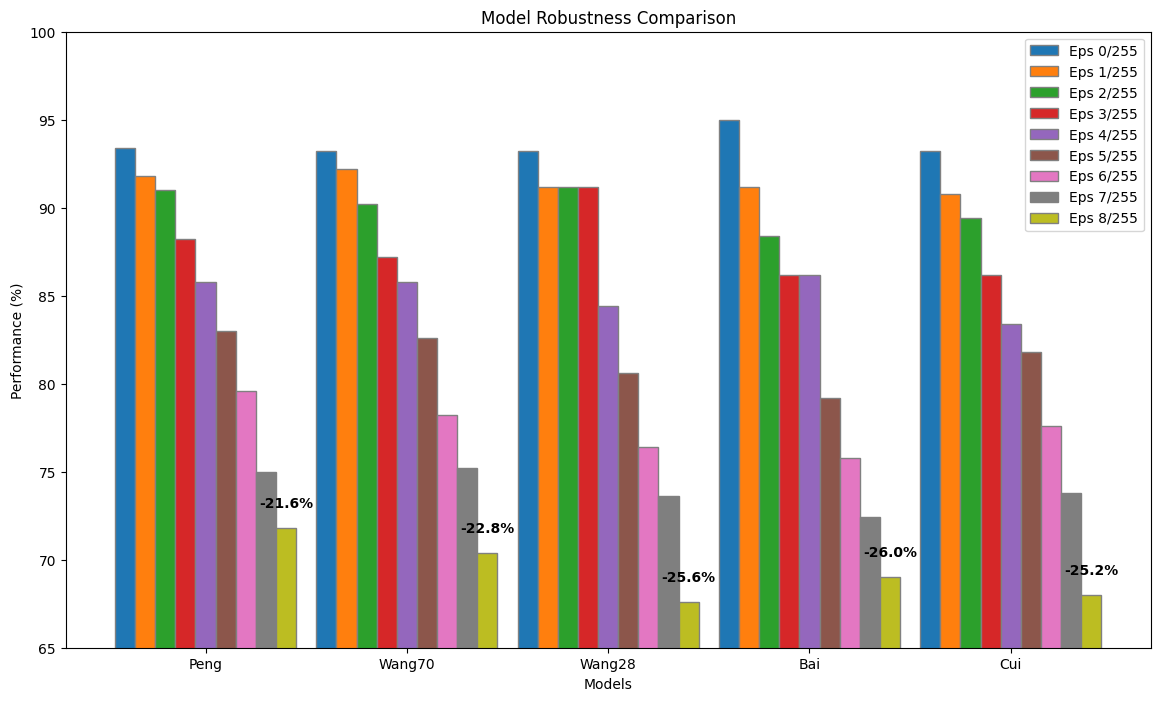

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Data
models = ['Peng', 'Wang70', 'Wang28', 'Bai', 'Cui']
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
data = [
    Peng,
    Wang70,
    Wang28,
    Bai,
    Cui
]

# Calculate the deltas (Final_Value - Initial_Value)
deltas = [data[i][0] - data[i][-1] for i in range(len(models))]

# Bar width
bar_width = 0.1
r = np.arange(len(models))

# Plotting
plt.figure(figsize=(14, 8))

for i, epsilon in enumerate(eps):
    plt.bar(r + i * bar_width, [data[j][i] for j in range(len(models))], width=bar_width, edgecolor='grey', label=f'Eps {epsilon}/255')

plt.title('Model Robustness Comparison')
plt.xlabel('Models')
plt.ylabel('Performance (%)')
plt.ylim(65, 100)
plt.xticks(r + bar_width * (len(eps) - 1) / 2, models)

for i in range(len(models)):
    plt.text(r[i] + bar_width * (len(eps) - 1), data[i][-1] + 1, f'-{deltas[i]:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.legend()
plt.show()


Decay vs n° of parameters


Class 0 Robustness

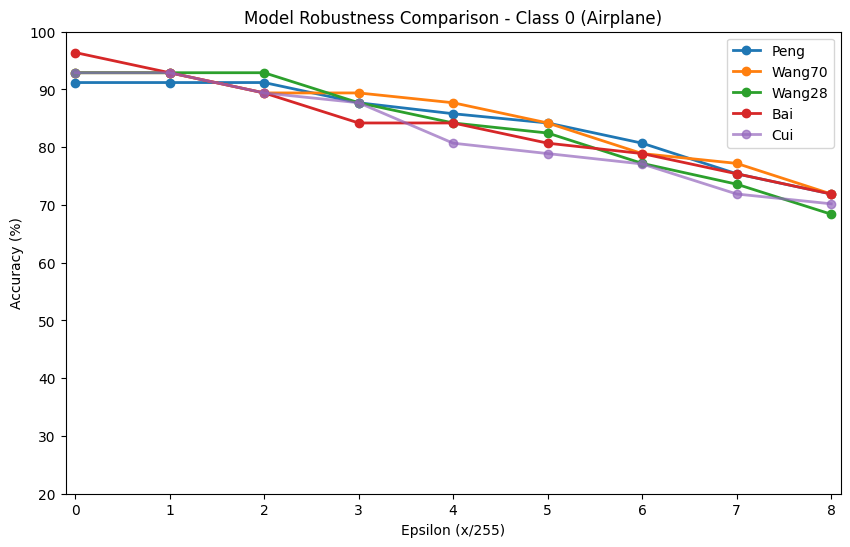

In [ ]:

import matplotlib.pyplot as plt

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_0 = [91.2, 91.2, 91.2, 87.7, 85.8, 84.2, 80.7, 75.4, 71.9]
Wang70_0 = [92.9, 92.9, 89.4, 89.4, 87.7, 84.2, 78.9, 77.2, 71.9]
Wang28_0 = [92.9, 92.9, 92.9, 87.7, 84.2, 82.46, 77.2, 73.6, 68.4]
Bai_0 = [96.4, 92.9, 89.4, 84.2, 84.2, 80.7, 78.9, 75.4, 71.9]
Cui_0 = [92.9, 92.9, 89.4, 87.7, 80.7, 78.9, 77.1, 71.9, 70.2]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_0, label='Peng', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_0, label='Wang70', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_0, label='Wang28', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_0, label='Bai', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_0, label='Cui', marker='o', linestyle='-', linewidth=2, alpha=0.7)

plt.title('Model Robustness Comparison - Class 0 (Airplane)')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 100)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()



class 1

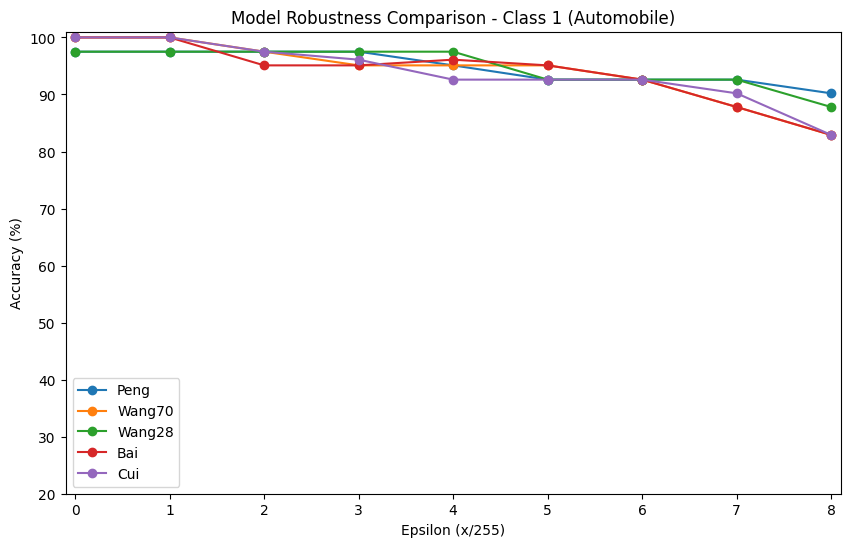

In [ ]:

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_1 = [97.5, 97.5, 97.5, 97.5, 95.1, 92.6, 92.6, 92.6, 90.2]
Wang70_1= [100, 100, 97.5, 95.1, 95.1, 95.1, 92.6, 87.8, 82.9]
Wang28_1 = [97.5, 97.5, 97.5, 97.5, 97.5, 92.6, 92.6, 92.6, 87.8]
Bai_1 = [100, 100, 95.1, 95.1, 96.1, 95.1, 92.6, 87.8, 82.9]
Cui_1 = [100, 100, 97.5, 96.1, 92.6, 92.6, 92.6, 90.2, 82.9]
#Standard = [95.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_1, label='Peng', marker='o')
plt.plot(eps, Wang70_1, label='Wang70', marker='o')
plt.plot(eps, Wang28_1, label='Wang28', marker='o')
plt.plot(eps, Bai_1, label='Bai', marker='o')
plt.plot(eps, Cui_1, label='Cui', marker='o')
#plt.plot(eps[:len(Standard)], Standard, label='Standard', marker='o')

plt.title('Model Robustness Comparison - Class 1 (Automobile)')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()


class 2

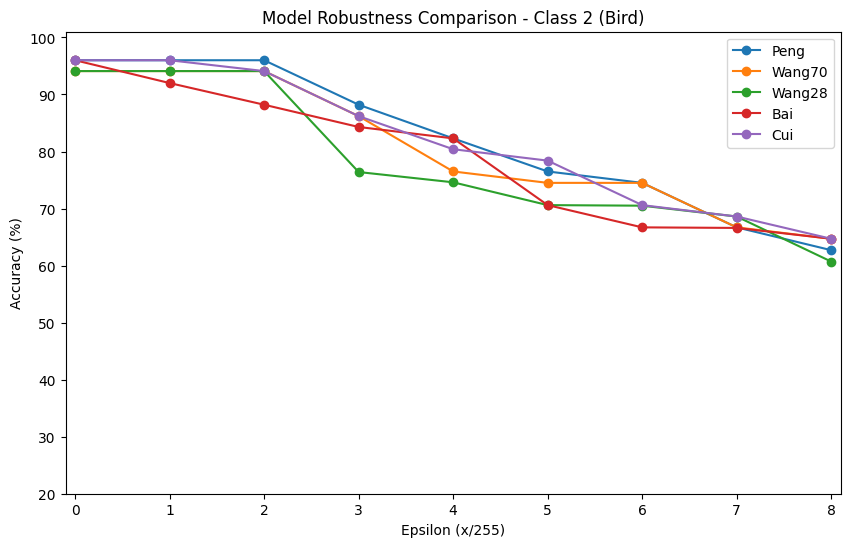

In [ ]:

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_2 =   [96, 96, 96, 88.2, 82.3, 76.5, 74.5, 66.7, 62.7]
Wang70_2 = [94.1, 94.1, 94.1, 86.2, 76.5, 74.5, 74.5, 66.7, 64.7]
Wang28_2 = [94.1, 94.1, 94.1, 76.4, 74.6, 70.6, 70.5, 68.6, 60.7]
Bai_2 =    [96, 92, 88.2, 84.3, 82.3, 70.6, 66.7, 66.6, 64.7]
Cui_2 =    [96, 96, 94.1, 86.2, 80.4, 78.4, 70.6, 68.6, 64.7]
#Standard = [94.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_2, label='Peng', marker='o')
plt.plot(eps, Wang70_2, label='Wang70', marker='o')
plt.plot(eps, Wang28_2, label='Wang28', marker='o')
plt.plot(eps, Bai_2, label='Bai', marker='o')
plt.plot(eps, Cui_2, label='Cui', marker='o')
#plt.plot(eps[:len(Standard)], Standard, label='Standard', marker='o')

plt.title('Model Robustness Comparison - Class 2 (Bird)')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()


class 3

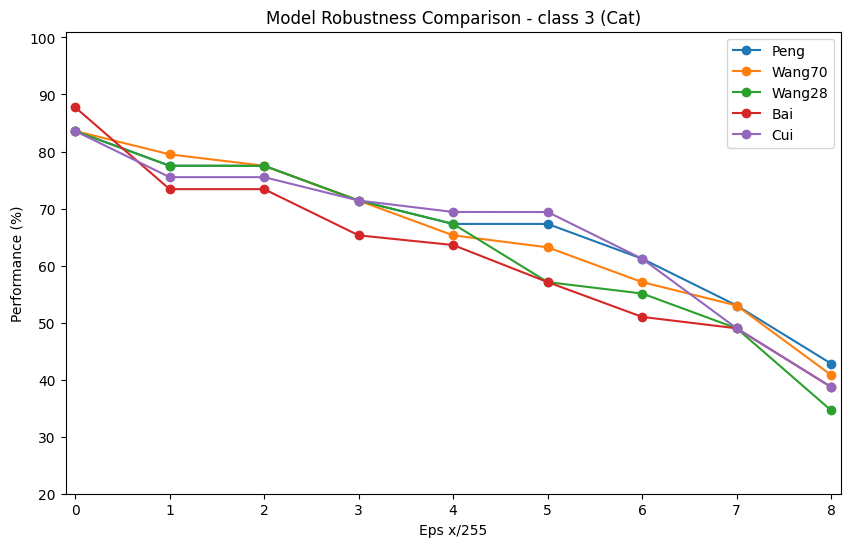

In [ ]:

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_3 = [83.6, 77.5, 77.5, 71.4, 67.3, 67.3, 61.2, 53, 42.8]
Wang70_3 = [83.6, 79.5, 77.5, 71.4, 65.3, 63.2, 57.1, 53, 40.8]
Wang28_3 = [83.6, 77.5, 77.5, 71.4, 67.3, 57.1, 55.1, 49, 34.6]
Bai_3= [87.76, 73.4, 73.4, 65.3, 63.6, 57.1, 51, 49, 38.7]
Cui_3 = [83.6, 75.5, 75.5, 71.4, 69.4, 69.39, 61.2, 49, 38.7]
#Standard = [89.8, 27.4, 2.4, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_3, label='Peng', marker='o')
plt.plot(eps, Wang70_3, label='Wang70', marker='o')
plt.plot(eps, Wang28_3, label='Wang28', marker='o')
plt.plot(eps, Bai_3, label='Bai', marker='o')
plt.plot(eps, Cui_3, label='Cui', marker='o')
#plt.plot(eps[:len(Standard)], Standard, label='Standard', marker='o')

plt.title('Model Robustness Comparison - class 3 (Cat)')
plt.xlabel('Eps x/255')
plt.ylabel('Performance (%)')
plt.ylim(20, 101)
plt.xlim(-0.1 ,8.1)
plt.legend()
plt.show()

class 4

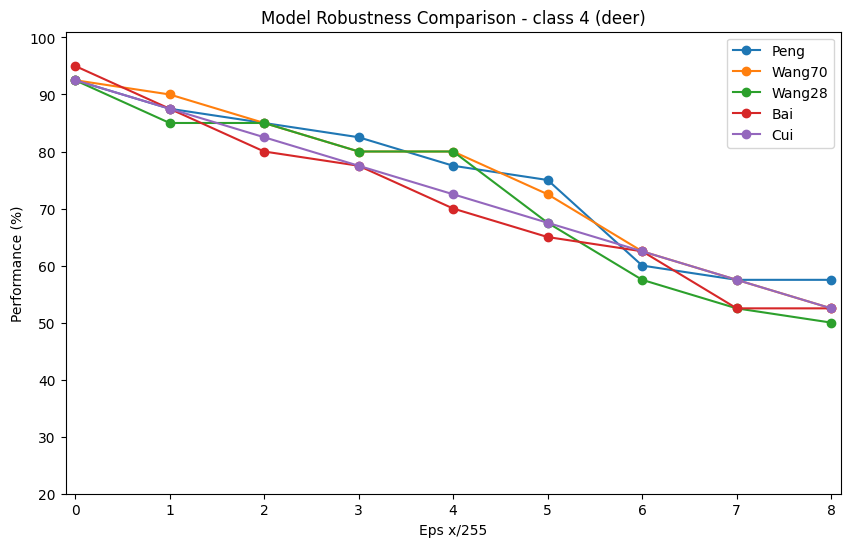

In [ ]:

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_4 = [92.5, 87.5, 85, 82.5, 77.5, 75, 60, 57.5, 57.5]
Wang70_4 = [92.5, 90, 85, 80, 80, 72.5, 62.5, 57.5, 52.5]
Wang28_4 = [92.5, 85, 85, 80, 80, 67.5, 57.5, 52.5, 50]
Bai_4 = [95, 87.5, 80, 77.5, 70, 65, 62.5, 52.5, 52.5]
Cui_4 = [92.5, 87.5, 82.5, 77.5, 72.5, 67.5, 62.5, 57.5, 52.5]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_4, label='Peng', marker='o')
plt.plot(eps, Wang70_4, label='Wang70', marker='o')
plt.plot(eps, Wang28_4, label='Wang28', marker='o')
plt.plot(eps, Bai_4, label='Bai', marker='o')
plt.plot(eps, Cui_4, label='Cui', marker='o')

plt.title('Model Robustness Comparison - class 4 (deer)')
plt.xlabel('Eps x/255')
plt.ylabel('Performance (%)')
plt.ylim(20, 101)
plt.xlim(-0.1 ,8.1)
plt.legend()
plt.show()

class 5

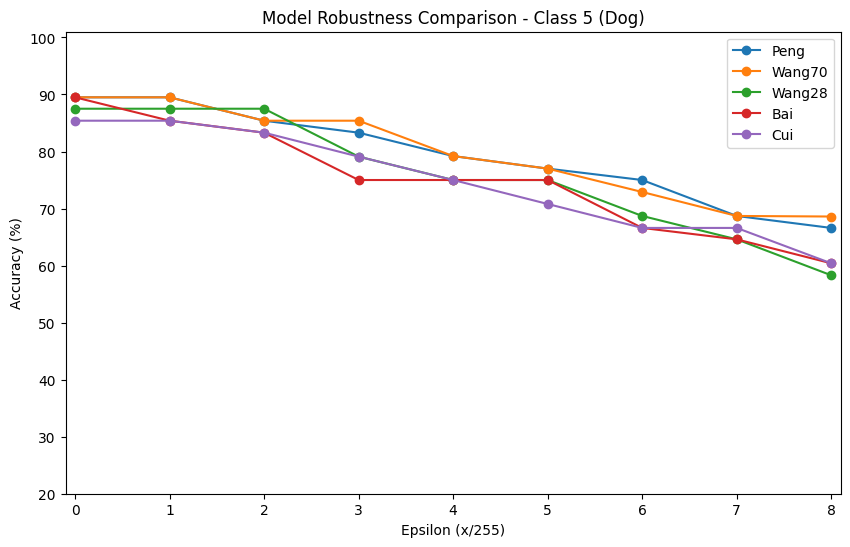

In [ ]:

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_5 = [89.5, 89.5, 85.4, 83.3, 79.2, 77.0, 75, 68.7, 66.6]
Wang70_5 = [89.5, 89.5, 85.4, 85.4, 79.2, 77.0, 72.9, 68.7, 68.6]
Wang28_5 = [87.5,87.5, 87.5, 79.1, 75, 75, 68.7, 64.6, 58.3]
Bai_5 = [89.5, 85.4, 83.3, 75, 75, 75, 66.6, 64.6, 60.4] #ERROR CHECK
Cui_5 = [85.4, 85.4, 83.3, 79.1, 75,70.8, 66.6, 66.6, 60.4]
#Standard = [93.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_5, label='Peng', marker='o')
plt.plot(eps, Wang70_5, label='Wang70', marker='o')
plt.plot(eps, Wang28_5, label='Wang28', marker='o')
plt.plot(eps, Bai_5, label='Bai', marker='o')
plt.plot(eps, Cui_5, label='Cui', marker='o')
#plt.plot(eps[:len(Standard)], Standard, label='Standard', marker='o')

plt.title('Model Robustness Comparison - Class 5 (Dog)')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()

class 6

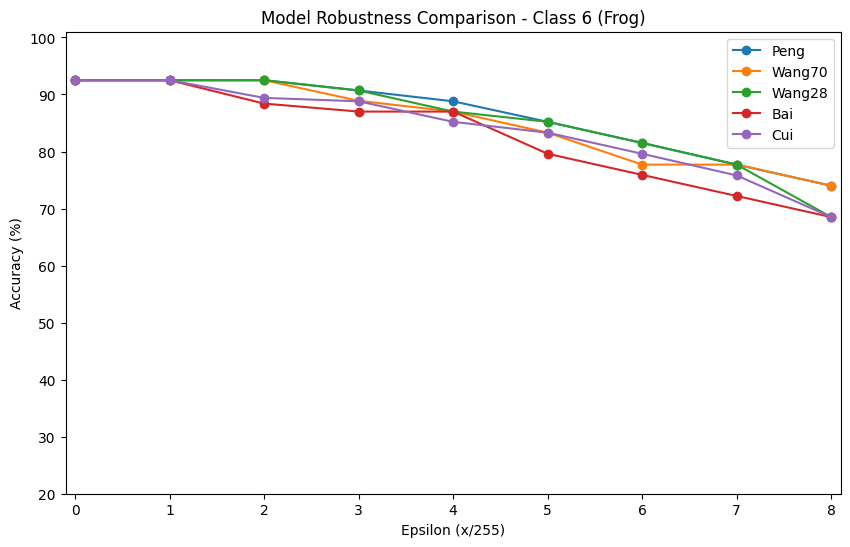

In [ ]:

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_6 = [92.5, 92.5, 92.5, 90.7, 88.8, 85.2, 81.5, 77.7, 74]
Wang70_6 = [92.5, 92.5, 92.5, 88.89, 87, 83.3, 77.7, 77.7, 74]
Wang28_6 = [92.5, 92.5, 92.5, 90.7, 87, 85.2, 81.5, 77.7, 68.5]
Bai_6 = [92.5, 92.5, 88.4, 87, 87, 79.6, 75.9, 72.2, 68.5]
Cui_6 = [92.5, 92.5, 89.4, 88.8, 85.2, 83.3, 79.6, 75.8, 68.5]
#Standard = [94.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_6, label='Peng', marker='o')
plt.plot(eps, Wang70_6, label='Wang70', marker='o')
plt.plot(eps, Wang28_6, label='Wang28', marker='o')
plt.plot(eps, Bai_6, label='Bai', marker='o')
plt.plot(eps, Cui_6, label='Cui', marker='o')
#plt.plot(eps[:len(Standard)], Standard, label='Standard', marker='o')


plt.title('Model Robustness Comparison - Class 6 (Frog)')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()

class 7

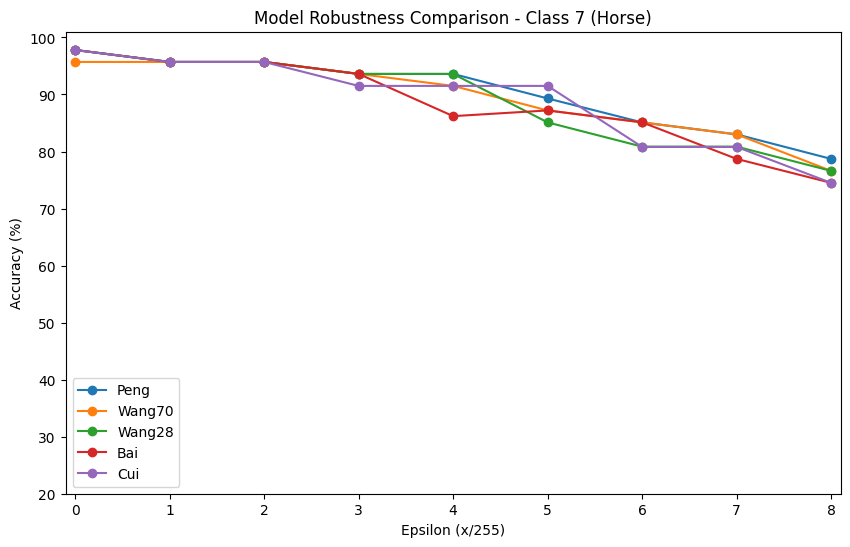

In [ ]:

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_7 = [97.8, 95.7, 95.7, 93.6, 93.6, 89.3, 85.1, 83, 78.7]
Wang70_7 = [95.7, 95.7, 95.7, 93.6, 91.5, 87.2, 85.1, 83, 76.6]
Wang28_7 = [97.8, 95.7, 95.7, 93.6 , 93.6, 85.1, 80.85, 80.85, 76.6]
Bai_7 = [97.8, 95.7, 95.7,93.6, 86.2, 87.2, 85.11, 78.7, 74.5]
Cui_7 = [97.8, 95.7, 95.7, 91.5, 91.5, 91.5, 80.8, 80.8, 74.5]
#Standard = [97.7, 00.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_7, label='Peng', marker='o')
plt.plot(eps, Wang70_7, label='Wang70', marker='o')
plt.plot(eps, Wang28_7, label='Wang28', marker='o')
plt.plot(eps, Bai_7, label='Bai', marker='o')
plt.plot(eps, Cui_7, label='Cui', marker='o')
#plt.plot(eps[:len(Standard)], Standard, label='Standard', marker='o')

plt.title('Model Robustness Comparison - Class 7 (Horse)')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()

class 8

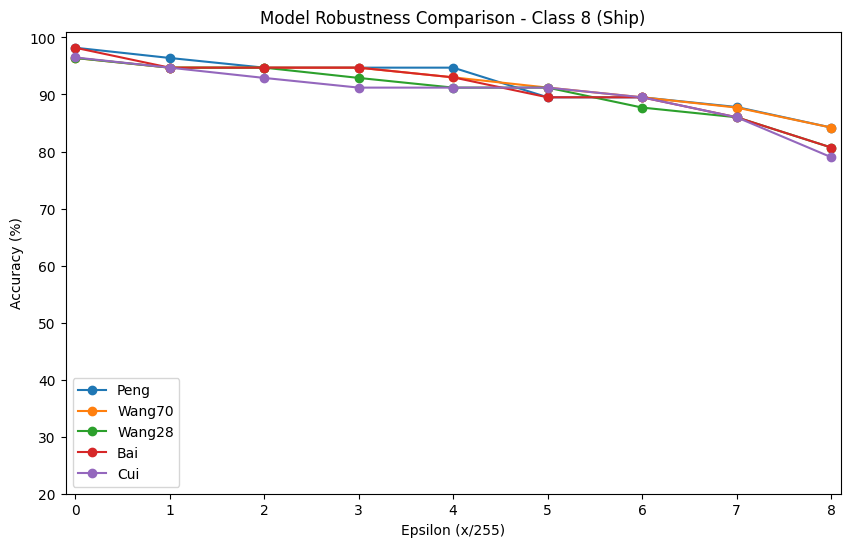

In [ ]:

# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_8 = [98.2, 96.4, 94.7, 94.7, 94.7, 89.5, 89.5, 87.8, 84.2]
Wang70_8 = [96.4, 94.7,94.7, 94.7, 93, 91.2,  89.5, 87.7, 84.2]
Wang28_8 = [96.4, 94.7, 94.7, 92.9, 91.2, 91.2, 87.7, 86, 80.7]
Bai_8 = [98.2, 94.7, 94.7, 94.7, 93, 89.5, 89.5, 86, 80.7]
Cui_8 = [96.49, 94.7, 92.9, 91.2, 91.2, 91.2, 89.5, 86, 79]
#Standard = [96.49,0.0,0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_8, label='Peng', marker='o')
plt.plot(eps, Wang70_8, label='Wang70', marker='o')
plt.plot(eps, Wang28_8, label='Wang28', marker='o')
plt.plot(eps, Bai_8, label='Bai', marker='o')
plt.plot(eps, Cui_8, label='Cui', marker='o')
#plt.plot(eps[:len(Standard)], Standard, label='Standard', marker='o')

plt.title('Model Robustness Comparison - Class 8 (Ship)')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()

class 9

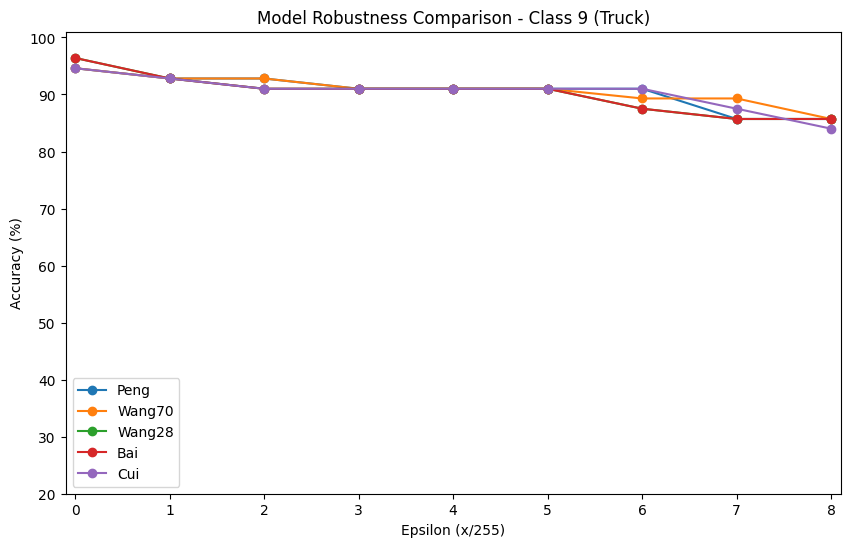

In [ ]:
import matplotlib.pyplot as plt
# Data
eps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Peng_9 = [94.6, 92.8, 92.8, 91, 91, 91, 91, 85.7, 85.7]
Wang70_9 = [94.6, 92.8, 92.8, 91, 91, 91, 89.3, 89.3, 85.7]
Wang28_9 = [96.4, 92.8, 91, 91, 91, 91, 87.5 , 85.7, 85.7]
Bai_9 = [96.4, 92.8, 91, 91, 91, 91, 87.5, 85.7, 85.7]
Cui_9 = [94.6, 92.8, 91, 91, 91, 91, 91, 87.5, 84]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_9, label='Peng', marker='o')
plt.plot(eps, Wang70_9, label='Wang70', marker='o')
plt.plot(eps, Wang28_9, label='Wang28', marker='o')
plt.plot(eps, Bai_9, label='Bai', marker='o')
plt.plot(eps, Cui_9, label='Cui', marker='o')

plt.title('Model Robustness Comparison - Class 9 (Truck)')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()

**Model's Accuracy drop per class**

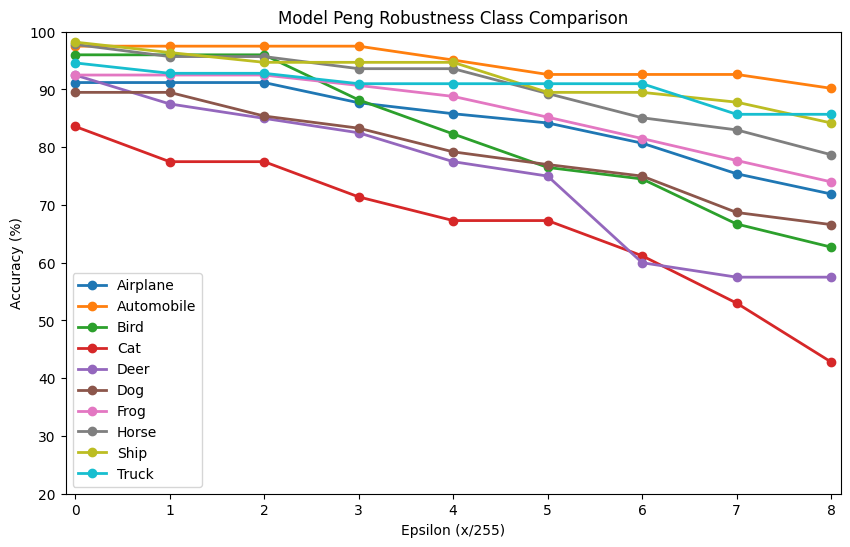

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(eps, Peng_0, label='Airplane', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_1, label='Automobile', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_2, label='Bird', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_3, label='Cat', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_4, label='Deer', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_5, label='Dog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_6, label='Frog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_7, label='Horse', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_8, label='Ship', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Peng_9, label='Truck', marker='o', linestyle='-', linewidth=2)

plt.title('Model Peng Robustness Class Comparison')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 100)
plt.xlim(-0.1,8.1)
plt.legend()
plt.show()

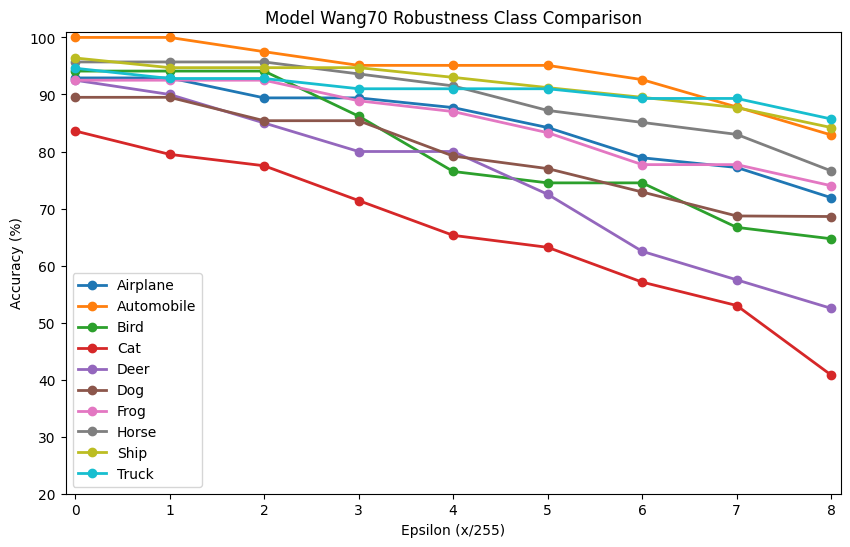

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(eps, Wang70_0, label='Airplane', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_1, label='Automobile', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_2, label='Bird', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_3, label='Cat', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_4, label='Deer', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_5, label='Dog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_6, label='Frog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_7, label='Horse', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_8, label='Ship', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang70_9, label='Truck', marker='o', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Model Wang70 Robustness Class Comparison')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()

# Display the plot
plt.show()

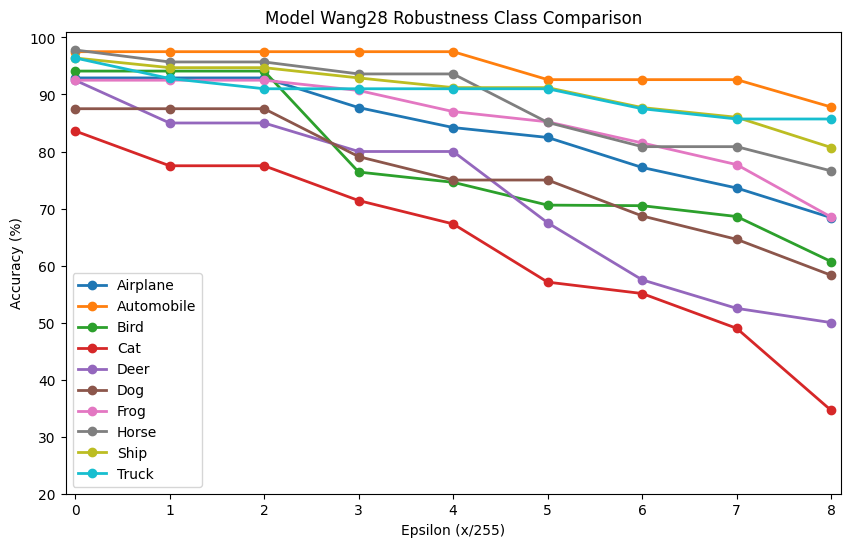

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(eps, Wang28_0, label='Airplane', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_1, label='Automobile', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_2, label='Bird', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_3, label='Cat', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_4, label='Deer', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_5, label='Dog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_6, label='Frog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_7, label='Horse', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_8, label='Ship', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Wang28_9, label='Truck', marker='o', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Model Wang28 Robustness Class Comparison')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()

# Display the plot
plt.show()

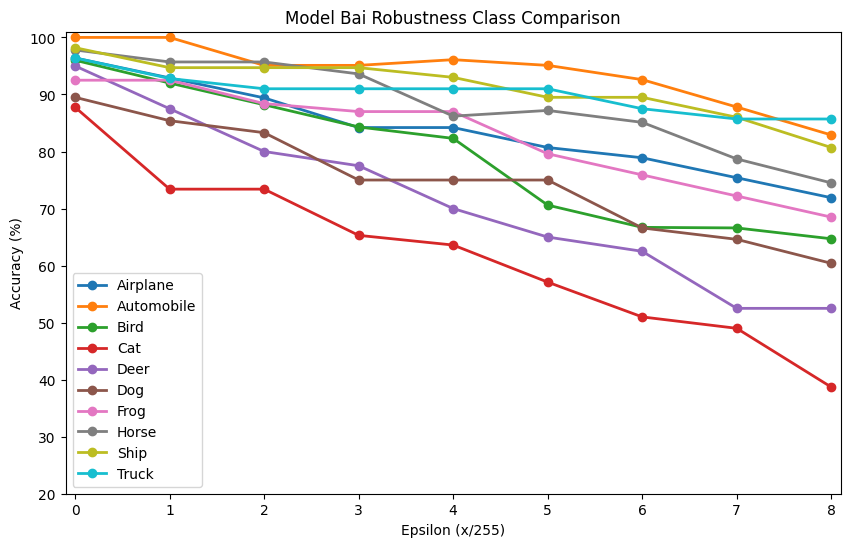

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(eps, Bai_0, label='Airplane', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_1, label='Automobile', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_2, label='Bird', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_3, label='Cat', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_4, label='Deer', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_5, label='Dog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_6, label='Frog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_7, label='Horse', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_8, label='Ship', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Bai_9, label='Truck', marker='o', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Model Bai Robustness Class Comparison')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()

# Display the plot
plt.show()

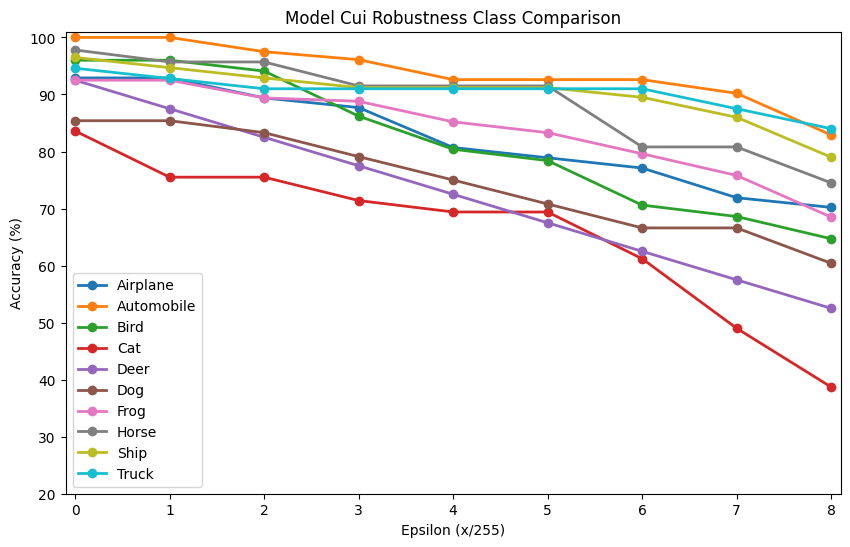

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(eps, Cui_0, label='Airplane', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_1, label='Automobile', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_2, label='Bird', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_3, label='Cat', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_4, label='Deer', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_5, label='Dog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_6, label='Frog', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_7, label='Horse', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_8, label='Ship', marker='o', linestyle='-', linewidth=2)
plt.plot(eps, Cui_9, label='Truck', marker='o', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Model Cui Robustness Class Comparison')
plt.xlabel('Epsilon (x/255)')
plt.ylabel('Accuracy (%)')
plt.ylim(20, 101)
plt.xlim(-0.1,8.1)
plt.legend()

# Display the plot
plt.show()